# 1. Perkenalan

**Halo**, Nama saya Zidny Yasrah Sallum,

Pada kesempatan kali ini saya akan menyelesaikan kasus dari sebuah perusahaan yang ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Saya akan bantu perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn).

Dataset yang digunakan adalah data yang berisi informasi customer seperti age, gender, region, feedback dan lain-lain.

Link Model : _https://huggingface.co/spaces/zidnyyasrah/Churn-prediction_

# 2. Import Libraries

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [271]:
# Read file dataset yang ada didalam csv menggunakan pandas
df = pd.read_csv('churn.csv')

In [272]:
# Menampilkan 5 baris pertama pada data
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [273]:
# Menampilkan 5 baris terakhir pada data
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [274]:
# Melihat sekilas informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Bisa dilihat data memiliki 22 kolom dan 37010 baris, dengan tipe data float, integer, dan object. Terlihat ada beberapa kolom yang memiliki nilai non-null yang lebih kecil dari kebanyakan kolom, mengindikasikan adanya missing values pada kolom-kolom tersebut.

Berikut dokumentasi dari makna masing-masing kolom yang ada pada dataset.

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

# 4. Exploratory Data Analysis (EDA)

Pertama saya akan mengclone dataframe yang akan digunakan khusus untuk eda, alasannya ketika nanti ada perubahan pada data, data aslinya tidak terpengaruh.  

In [275]:
# Mengclone data
df_eda = df.copy()

Setelah itu saya akan melihat distribusi/perbandingan dari kolom gender

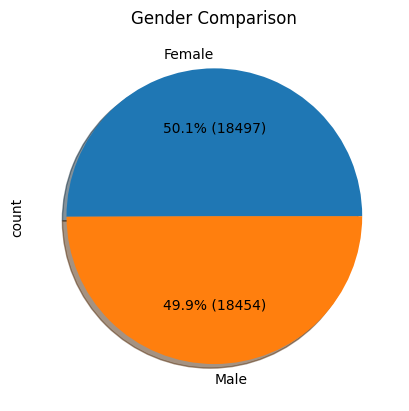

In [276]:
# Membuat variable baru untuk menampung jumlah masing-masing value 
gender = df_eda['gender'].value_counts()

# Membuat dan menampilkan pie chart
labels = ['Female','Male']
gender.plot(kind='pie', shadow=True,title='Gender Comparison', labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*gender.sum()))
plt.show()

Bisa dilihat pada chart diatas, perbandingan gender female dan male hampir sama banyak, setelah ini pada kolom age

<Axes: xlabel='age', ylabel='Count'>

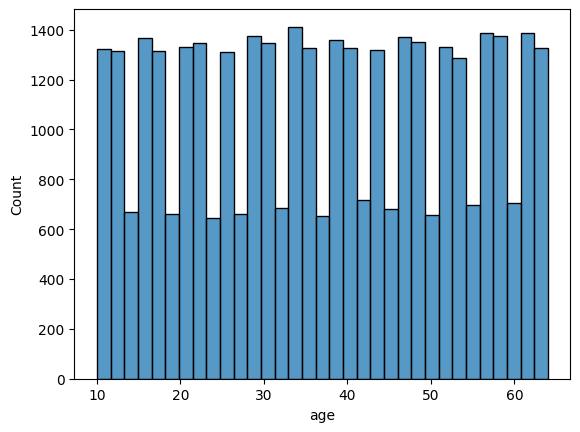

In [277]:
# Histogram pada kolom age
sns.histplot(data=df_eda, x='age')

Sepertinya masing-masing usia memiliki jumlah data yang sama, saya akan membuat group dari age agar lebih mudah untuk membedakannya.

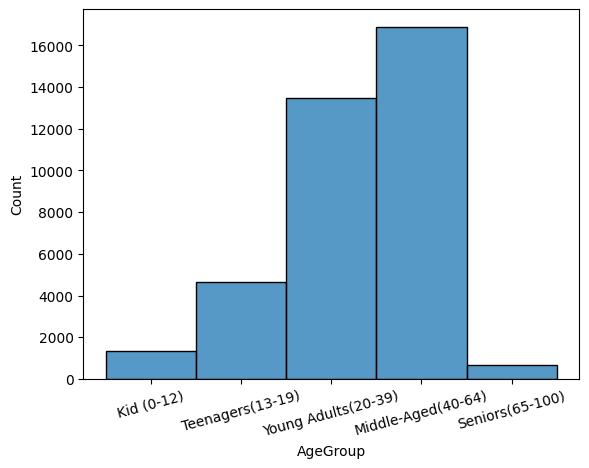

In [278]:
# Konfigurasi dari kolom baru agegroup
bins = [0,12,19,39,64,100]
labels = ['Kid (0-12)','Teenagers(13-19)','Young Adults(20-39)','Middle-Aged(40-64)','Seniors(65-100)']
df_eda['AgeGroup'] = pd.cut(df_eda['age'], bins=bins, labels=labels, right=False)

# Menampilkan plot
sns.histplot(data=df_eda, x='AgeGroup')
plt.xticks(rotation=15)
plt.show()

Terlihat pada plot diatas, customer terbanyak adalah Middle-Aged atau yang memiliki rentang usia 40-64 tahun. disusul oleh Young-Adults di usia 20-39 tahun. Bisa dilihat bahwa produk ini tidak terlalu populer pada anak-anak dan remaja serta senior.

Setelah ini saya akan melihat distribusi dari kolom-kolom lainnya

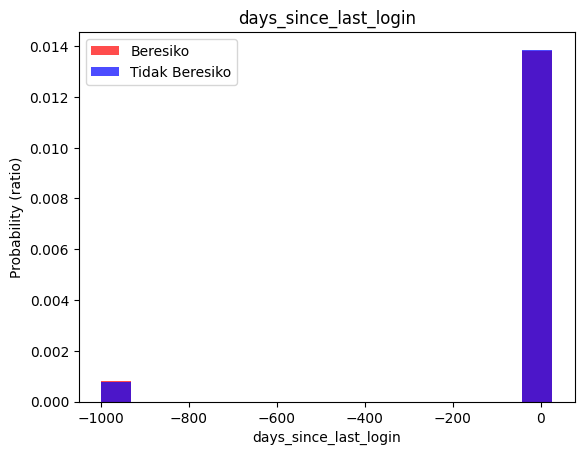

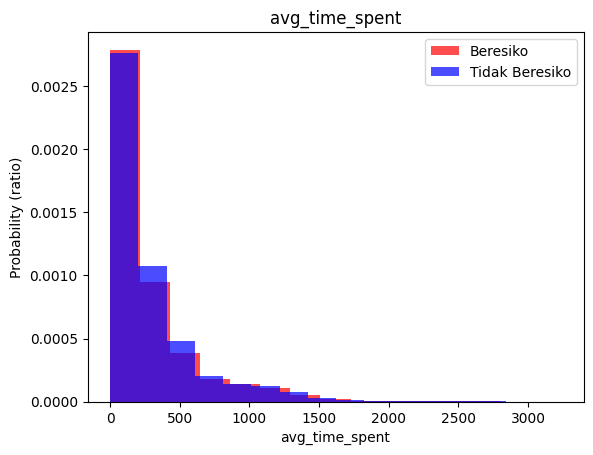

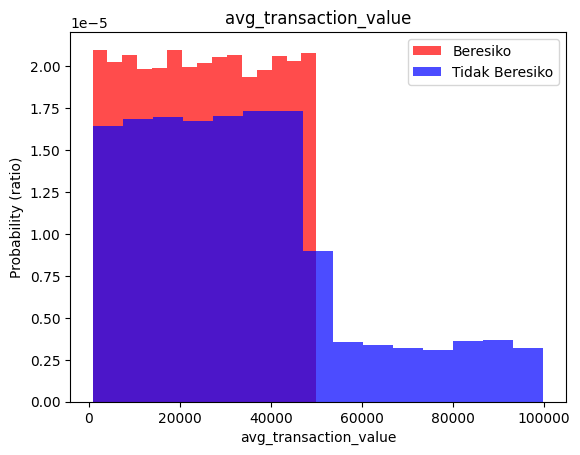

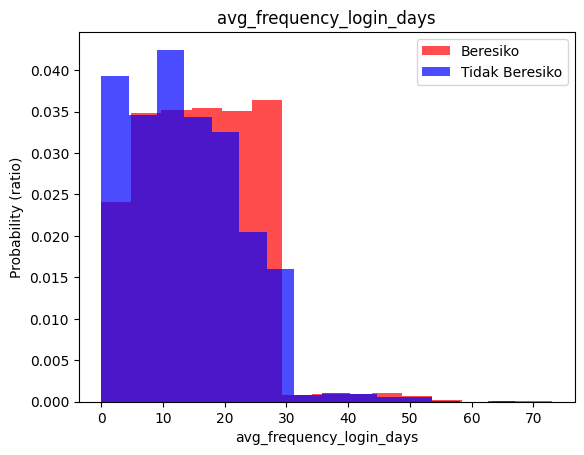

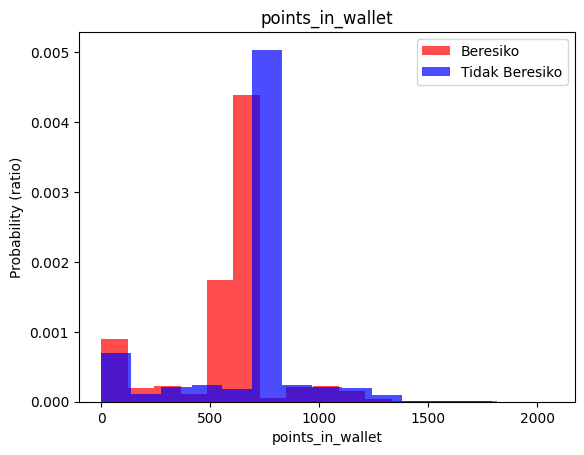

In [279]:
numdata = df_eda[['days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']]

for i in range(len(numdata.columns)):
  label = numdata.columns[i]
  plt.hist(df[df['churn_risk_score']==1][label],color='red',label='Beresiko',alpha=0.7, density=True, bins=15)
  plt.hist(df[df['churn_risk_score']==0][label],color='blue',label='Tidak Beresiko',alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability (ratio)')
  plt.xlabel(label)
  plt.legend()
  plt.show()

* Pada kolom `days_since_last_login`, distribusi yang ada pada plot terlihat sedikit aneh, dikarenakan adanya value negatif dan juga memiliki range yang jauh pada value lainnya, saya akan bahas masalah ini lebih lanjut nantinya.

* Pada kolom `avg_time_spent`, distribusi yang terlihat agak skew kekiri (Positive skewness). Time spent pada website yang paling dominan berada di rentang 0-500.

* Pada kolom `avg_transaction_value`, terlihat bahwa nilai transaksi rata-rata yang diatas 50.000, akan sangat kecil resiko terjadinya churn pada konsumen tersebut.

* Pada kolom `avg_frequency_login_days`, saya akan asumsikan bahwa kolom ini memberikan informasi tentang rata-rata login perhari dari customer. Terlihat rata-rata yang paling banyak ada di angka 0 sampai 30 hari

* Pada kolom `points_in_wallet`, menunjukkan point yang didapat dari setiap transaksi, orang-orang yang memiliki point diatas 500 beresiko untuk churn sedangkan yang ada diatas kisaran 700 tidak beresiko




Saya akan menganalisa kolom `days_since_last_login` lebih dalam dengan melihat masing-masing value yang ada di kolom ini. 

In [280]:
# Melihat jumlah masing-masing value yang ada
df_eda['days_since_last_login'].value_counts()

days_since_last_login
 12     2381
 13     2373
 14     2307
 15     2279
 11     2262
 10     2093
 16     2070
-999    2001
 9      1863
 17     1747
 8      1573
 18     1445
 7      1442
 19     1309
 6      1257
 5      1234
 20     1184
 21     1015
 4       999
 22      896
 3       852
 23      728
 2       615
 24      471
 1       328
 25      204
 26       82
Name: count, dtype: int64

Terlihat bahwa ada value bernilai -999 pada kolom `days_since_last_login`. Tidak ada keterangan resmi mengenai maksud dari angka -999 ini, oleh karena itu saya akan ubah saja value tersbut menjadi 0 pada bagian feature engineering nantinya.

Selanjutnya saya akan lihat chart untuk kolom-kolom lainnya

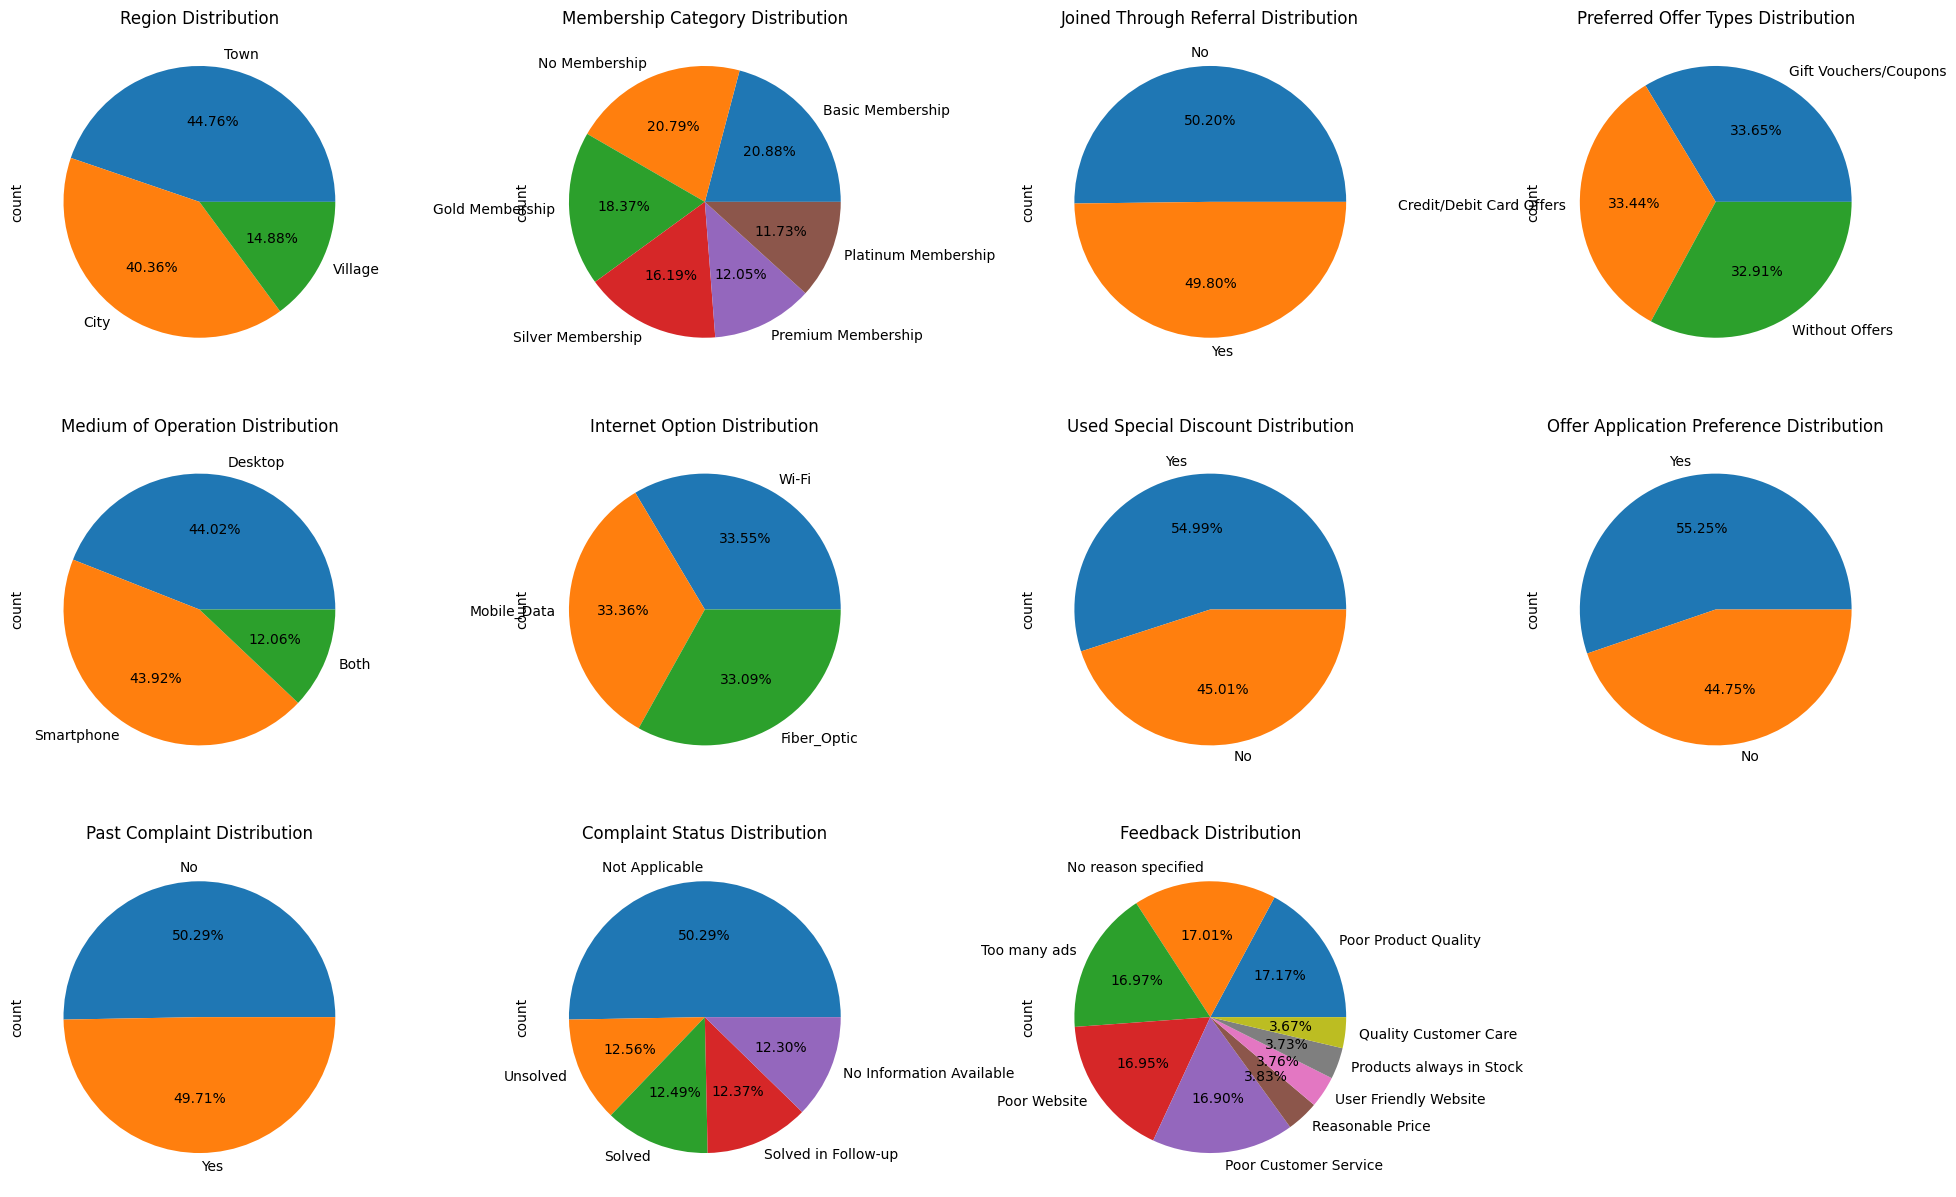

In [281]:
# Mengatur ukuran kanvas dari plot
plt.figure(figsize=(25,15))

# Membuat pie chart untuk masing-masing kolom 
plt.subplot(3,4,1)
df_eda['region_category'].value_counts().plot(kind='pie', title='Region Distribution',autopct='%.2f%%')
plt.subplot(3,4,2)
df_eda['membership_category'].value_counts().plot(kind='pie', title='Membership Category Distribution',autopct='%.2f%%')
plt.subplot(3,4,3)
df_eda['joined_through_referral'].value_counts().plot(kind='pie', title='Joined Through Referral Distribution',autopct='%.2f%%')
plt.subplot(3,4,4)
df_eda['preferred_offer_types'].value_counts().plot(kind='pie', title='Preferred Offer Types Distribution',autopct='%.2f%%')
plt.subplot(3,4,5)
df_eda['medium_of_operation'].value_counts().plot(kind='pie', title='Medium of Operation Distribution',autopct='%.2f%%')
plt.subplot(3,4,6)
df_eda['internet_option'].value_counts().plot(kind='pie', title='Internet Option Distribution',autopct='%.2f%%')
plt.subplot(3,4,7)
df_eda['used_special_discount'].value_counts().plot(kind='pie', title='Used Special Discount Distribution',autopct='%.2f%%')
plt.subplot(3,4,8)
df_eda['offer_application_preference'].value_counts().plot(kind='pie', title='Offer Application Preference Distribution',autopct='%.2f%%')
plt.subplot(3,4,9)
df_eda['past_complaint'].value_counts().plot(kind='pie', title='Past Complaint Distribution',autopct='%.2f%%')
plt.subplot(3,4,10)
df_eda['complaint_status'].value_counts().plot(kind='pie', title='Complaint Status Distribution',autopct='%.2f%%')
plt.subplot(3,4,11)
df_eda['feedback'].value_counts().plot(kind='pie', title='Feedback Distribution',autopct='%.2f%%')

# Menampilkan pie chart
plt.show()

* Pada kolom `region_category`, menunjukkan jenis region customer tersebut terlihat kebanyakan cutomer berada dari region yang berjenis "town" dan "city", hanya sedikit customer yang berada di "village"

* Pada kolom `membership_category`, memiliki jenis-jenis membership yang terbagi merata untuk setiap jenisnya, hal yang bagus namun masih ada beberapa customer yang belum memiliki membership.

* Pada kolom `joined_through_referral`, menunjukkan apakah customer join menggunakan kode referral atau tidak, terlihat bahwa pembagiannya merata antara yang iya dan tidak.

* Pada kolom `preferred_offer_types`, juga sama pembagiannya merata untuk setiap preferensi dari jenis offer yang diberikan

* Pada kolom `medium_of_operation`, menunjukkan device yang digunakan oleh customer untuk melakukan transaksi, terlihat bahwa pembagian dari penggunaan desktop dan smartphone hampir sama banyak, dan ada juga sebagian kecil orang yang melakukan transaksi dikedua device tersebut.

* Pada kolom `internet_option`, Pembagiannya merata antara mobile data, wifi, dan juga fiber optic.

* Pada kolom `used_special_discount`, menunjukkan apakah customer menggunakan diskon spesial yang ditawarkan saat melakukan transaksi, terlihat bahwa agak lebih banyak orang menggunakan spesial diskon tersebut dibanding yang tidak

* Pada kolom `offer_application_preference`, Menunjukkan apakah customer lebih memilih mendapatkan penawaran atau tidak, dan terlihat sama, agak lebih banyak orang yang prefer mendapatkan penawaran

* Pada kolom `past_complaint`, menunjukkan apakah customer pernah melakukan complaint sebelumnya, dapat dilihat juga bahwa adanya distribusi yang merata dari yang iya dan yang tidak

* Pada kolom `complaint_status`, kebanyakan berisi value not applicable atau N/A, itu artinya mereka adalah orang-orang yang tidak pernah melakukan complaint, sedangkan untuk value yang lainnya terlihat terdistribusi dengan merata

* Pada kolom `feedback`, terlihat kebanyakan dari feedback yang ada termasuk negatif, bisa dibilang bahwa hanya 1 dari 6 feedback yang merupakan feedback positif.

Saya jadi penasaran, pada kolom feedback tersebut banyak yang memberikan feedback negatif, apakah hal itu akan berpengaruh dengan resiko churn.

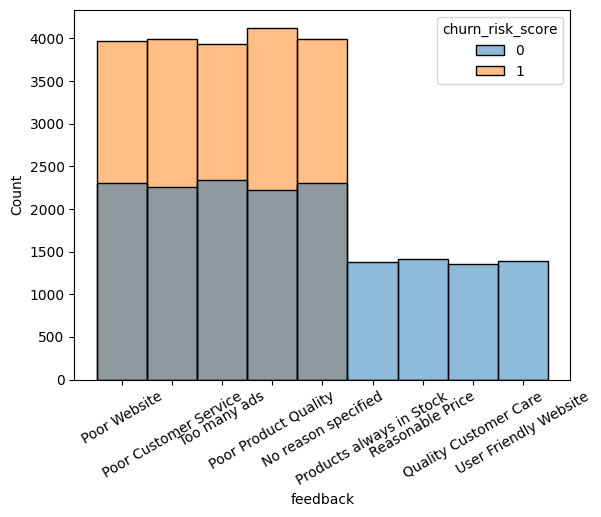

In [282]:
# Melihat histogram feedback dengan hue dari resiko churn
sns.histplot(data=df_eda, x='feedback', hue='churn_risk_score')
plt.xticks(rotation=30)
plt.show()

Hmm sangat jelas terlihat bahwa orang-orang yang memberikan feedback negatif sangat beresiko untuk berhenti menggunakan produk, sebaliknya yang memberikan feedback positif sangat kecil kemungkinannya untuk terjadi churn.

Selanjutnya saya akan lihat korelasi dari masing-masing kolom numerik yang ada

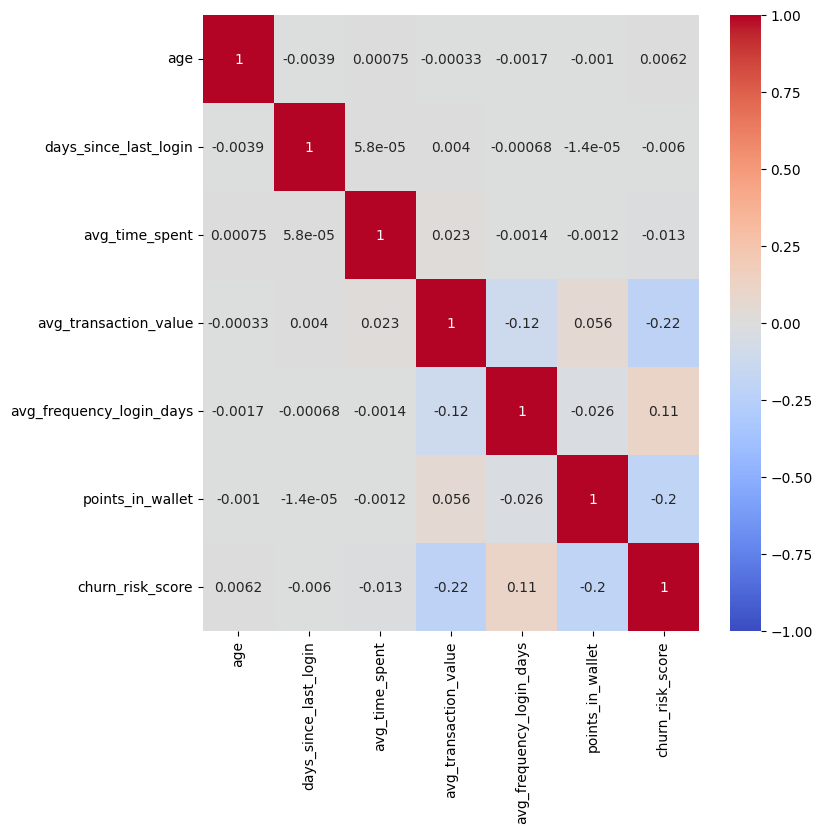

In [283]:
# Membuat list untuk menampung kolom yang tergolong numerik saja
data_corr = df_eda.copy()
numeric_features = data_corr.select_dtypes(include=['int64','float64']).columns

# Membuat heatmap correlation pada kolom numerik
corr = data_corr[numeric_features].corr()
ax, fig = plt.subplots(figsize=(8,8))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

Terlihat bahwa tidak ada korelasi yang signifikan pada tiap-tiap kolomnya, terakhir pada kolom yang akan dijadikan label pada model nantinya. Saya akan lihat apakah ada imbalance data pada label tersebut.

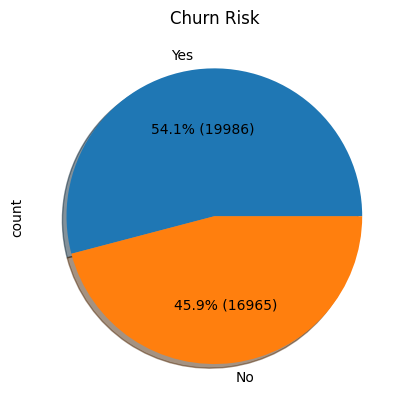

In [284]:
# Membuat variable baru untuk menampung jumlah masing-masing value 
churn = df_eda['churn_risk_score'].value_counts()

# Membuat dan menampilkan pie chart
labels = ['Yes','No']
churn.plot(kind='pie', shadow=True,title='Churn Risk', labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*gender.sum()))
plt.show()

Terlihat bahwa distribusi yang ada masih terbilang normal. Sekarang saya akan lanjut ke feature engineering.

# 5. Feature Engineering

## Feature Selection

Disini saya akan drop kolom `user_id`, karena menurut personal judgement saya, user id itu tidak akan berpengaruh terhadap target variabel yang dimiliki. Sedangkan untuk kolom `days_since_last_login`, seperti yang sudah dinarasikan pada bagian EDA, saya akan ubah value -999 menjadi 0. 

In [285]:
# drop kolom user_id
df.drop(['user_id'],axis=1, inplace=True)

# mereplace value -999 menjadi 0
df['days_since_last_login'] = df['days_since_last_login'].replace(-999,0)

## Feature Creation

Pada kolom `joining_date`, berisi tanggal berupa kapan user join ke website, formatnya tahun, bulan dan hari (yyyy-mm-dd), sedangkan pada kolom `last_visit_time`, memiliki format jam, menit, detik (hh:mm:ss). Untuk itu, sebelum diproses lebih lanjut saya akan ubah format tersebut menjadi 5 kolom baru dengan membuat kolom bernama year, month, day dan untuk kolom satu lagi yaitu hour, minuite(saya ga mengikutsertakan kolom second dikarenakan menurut saya tidak terlalu berpengaruh). Dan setelah informasi tersebut disimpan kedalam kolom baru, saya akan drop kedua kolom sumbernya yaitu pada kolom `joining_date` dan `last_visit_time`

In [286]:
# Mengubah tipe data menjadi datetime
df["joining_date"] = pd.to_datetime(df["joining_date"])

# Membuat kolom baru untuk year,month, dan day
df["year_join"] = df["joining_date"].dt.year
df["month_join"] = df["joining_date"].dt.month
df["day_join"] = df["joining_date"].dt.day

# Split kolom last_visit_time 
df["hour_visit"] = df["last_visit_time"].str.split(":").str[0]
df["minute_visit"] = df["last_visit_time"].str.split(":").str[1]

# Drop kedua kolom awal
df = df.drop(['joining_date','last_visit_time'],axis=1)

## Data Splitting

Memecah data menjadi feature dan label

In [287]:
# Memecah X dan y dari dataframe
X = df.drop(['churn_risk_score'],axis=1)
y = df[['churn_risk_score']]
y

,churn_risk_score
0,1
1,1
2,0
3,1
4,0
...,...
37005,0
37006,0
37007,0
37008,0


Memecah data lebih lanjut menjadi train set, test set dan validation set.

In [288]:
# Pertama memecah data menjadi test dan temporary set
X_temp, X_test, y_temp, y_test  = train_test_split(X,y, test_size = 0.9, random_state=0)

# dari temporary set tadi dipecah lagi menjadi train dan validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size = 0.8, random_state=0)

## Missing Values

Mengecek apakah ada missing values dari ketiga data yang sudah dipecah tadi.

In [289]:
# Mengecek apakah ada missing values di train-set
X_train.isnull().sum()

age                               0
gender                            0
region_category                  98
membership_category               0
joined_through_referral         110
preferred_offer_types             7
medium_of_operation             104
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_join                         0
month_join                        0
day_join                          0
hour_visit                        0
minute_visit                      0
dtype: int64

In [290]:
# Mengecek apakah ada missing values di test-set
X_test.isnull().sum()

age                                0
gender                            50
region_category                 4879
membership_category                0
joined_through_referral         4870
preferred_offer_types            263
medium_of_operation             4845
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
year_join                          0
month_join                         0
day_join                           0
hour_visit                         0
minute_visit                       0
dtype: int64

In [291]:
# Mengecek apakah ada missing values di validation-set
X_valid.isnull().sum()

age                               0
gender                            9
region_category                 454
membership_category               0
joined_through_referral         462
preferred_offer_types            18
medium_of_operation             446
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_join                         0
month_join                        0
day_join                          0
hour_visit                        0
minute_visit                      0
dtype: int64

Terlihat ada beberapa missing values di kolom `gender`, `region_category`, `joined_through_referral`, `preferred_offer_types`, `medium_of_operation`. 

Untuk kolom `region_category`, `preferred_offer_types`, `medium_of_operation`, dikarenakan ketiga kolom tersebut merupakan kolom categorical, saya akan membuat kategori baru bernama others untuk mengisi missing values pada kolom-kolom tersebut.  

In [292]:
# fill missing values di ketiga kolom dengan value 'others'
X_train[['region_category', 'preferred_offer_types', 'medium_of_operation']] = X_train[['region_category', 'preferred_offer_types', 'medium_of_operation']].fillna('others')

X_test[['region_category', 'preferred_offer_types', 'medium_of_operation']] = X_test[['region_category', 'preferred_offer_types', 'medium_of_operation']].fillna('others')

X_valid[['region_category', 'preferred_offer_types', 'medium_of_operation']] = X_valid[['region_category', 'preferred_offer_types', 'medium_of_operation']].fillna('others')

Sedangkan pada kolom `joined_through_referral` dan `gender` berisi binary value antara yes or no atau female or male, oleh karena itu saya tidak bisa menambah value baru yaitu others, maka saya akan menggunakan Simple Imputer dengan strategy `most_frequent` untuk mengimputasi missing values dari kolom tersebut.

In [293]:
# Imputer menggunakan simpleimputer
imputer = SimpleImputer(strategy='most_frequent')

# Imputasi untuk train set
X_train_impute = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_impute, columns=X_train.columns)

# Imputasi untuk test set
X_test_impute = imputer.fit_transform(X_test)
X_test = pd.DataFrame(X_test_impute, columns=X_test.columns)

# Imputasi untuk validation set
X_valid_impute = imputer.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid_impute, columns=X_valid.columns)

In [294]:
# Melihat apakah masih ada null values pada data
print('Missing Values Train-set :',X_train.isnull().values.any())
print('Missing Values Test-set :',X_test.isnull().values.any())
print('Missing Values Validation-set :',X_valid.isnull().values.any())

Missing Values Train-set : False
Missing Values Test-set : False
Missing Values Validation-set : False


Sudah tidak ada missing values pada ketiga dataset

## Duplicate Data

In [295]:
# Mengecek apakah ada data duplikat
print('Duplicate Data Train-set :',X_train.duplicated().values.any())
print('Duplicate Data Validation-set :',X_valid.duplicated().values.any())

Duplicate Data Train-set : False
Duplicate Data Validation-set : False


Tidak ada duplicate data pada train set dab validation set

## Outlier

Disini saya tidak melakukan outliers handling, dikarenakan tidak adanya outliers yang signifikan pada dataset, terlebih lagi saya juga ingin membiarkan value outliers tersebut alasannya karena mereka bukan berasal dari error atau salahnya input data. Jadi, jika saya menghilangkan atau memanipulasi data itu akan menjadikan model yang akan dibuat nanti menjadi tidak akurat ketika memprediksi extreme values yang benar-benar ada di kehidupan nyata.

## Get Numerical and Categorical Features

Memisah kolom-kolom yang bersifat numerical dan categorical

In [296]:
# Menampung fitur yang tergolong numerik kedalam list
numeric_features = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet',
                    'year_join','month_join','day_join','hour_visit','minute_visit']

# Menampung fitur yang tergolong kategorik kedalam list
categorical_features = ['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation',
                        'internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']

## Pipeline

Disini saya akan menggunakan pipeline untuk mempermudah proses scaling, encoding dan juga menggabungkan keduanya. 

Untuk scaling saya menggunakan StandardScaler, alasannya dikarenakan data yang bisa dibilang terdistribusi normal jadi saya akan melakukan standarisasi pada data dengan menggunakan StandardScaler. Dengan menggunakan StandardScaler, saya dapat memastikan bahwa semua fitur memiliki skala yang serupa dan dapat diperlakukan dengan setara. 

Untuk bagian encoding, saya menggunakan OneHotEncoder. Alasannya, dikarenakan kolom kategorikal yang saya pilih tersebut tidak memiliki tingkatan ataupun order. Jadi encoder seperti OneHotEncoder lebih cocok untuk kasus ini dibanding encoder-encoder lainnya seperti ordinalencoder dll. 

In [297]:
# Membuat pipeline terhadap kedua kategori data
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, numeric_features),
    ('pipe_cat', cat_pipeline, categorical_features)
])

# Fit dan Transform pipeline

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_valid)
X_test = final_pipeline.transform(X_test)

# Mengubah tipe data
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

X_valid=np.asarray(X_train).astype(np.int)
y_valid=np.asarray(y_train).astype(np.int)

# 6. Model Definition

Untuk metrics yang akan saya gunakan pada kedua model Sequential API dan Functional API adalah metric accuracy dikarenakan pada EDA diatas terlihat bahwa variable target yang dimiliki mempunyai distribusi yang balance, oleh karena itu metriks accuracy akan sangat baik dan simple untuk melihat peforma model nantinya.

## Sequential API Definition

Pada sequential api yang pertama, saya menggunakan 1 hidden layer dimana saya menggunakan 100 neuron dan menggunakan activation function relu terhadap input dan hidden layernya. untuk initializer saya menggunakan HeNormal dan regularizernya l2. Serta pada output layer saya menggunakan activation function sigmoid dan disaat compile menggunakan loss function binary crossentropy dikarenakan kasus binary classification. Terakhir pada optimizersnya saya akan coba menggunakan adam dengan metrics accuracy.

In [298]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(64).shuffle(740).repeat(2).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
val_pipe = tf.data.Dataset.from_tensor_slices((X_valid,y_valid)).batch(32)

model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(56, activation='relu',input_shape=(56,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq.add(tf.keras.layers.Dense(100, activation='relu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

## Functional API Definition

Sedangkan pada Functional API, saya akan menggunakan 2 hidden layer, dengan dense atau neuron yang kecil yaitu masing-masing 16 dan 8, serta pada kedua hidden layer tersebut menggunakan activation function elu. Sedangkan pada output layernya sama seperti di sequential, yang membedakan hanya di saat compile saya menggunakan optimizer SGD.

In [299]:
# Membuat model functional
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

input_layer = Input(shape=(56,))
hidden_layer_1 = Dense(16, activation='elu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='elu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)
model_fun = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_fun.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

# 7. Model Training

Disini saya akan train model sequential API dan functional API dengan masing-masing epochs berjumlah 20

## Sequential API Training

In [300]:
# Train Model Sequential API
history_seq = model_seq.fit(train_pipe, epochs=20, validation_data=val_pipe)

Epoch 1/20


24/24 [==============================] - 2s 18ms/step - loss: 1.7159 - accuracy: 0.6027 - val_loss: 1.5738 - val_accuracy: 0.7041
Epoch 2/20
24/24 [==============================] - 0s 7ms/step - loss: 1.4685 - accuracy: 0.7331 - val_loss: 1.3511 - val_accuracy: 0.7757
Epoch 3/20
24/24 [==============================] - 0s 6ms/step - loss: 1.2525 - accuracy: 0.8068 - val_loss: 1.1395 - val_accuracy: 0.8392
Epoch 4/20
24/24 [==============================] - 0s 7ms/step - loss: 1.0472 - accuracy: 0.8561 - val_loss: 0.9444 - val_accuracy: 0.8824
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.8711 - accuracy: 0.8932 - val_loss: 0.7945 - val_accuracy: 0.8905
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 0.7407 - accuracy: 0.9034 - val_loss: 0.6815 - val_accuracy: 0.9230
Epoch 7/20
24/24 [==============================] - 0s 6ms/step - loss: 0.6475 - accuracy: 0.9243 - val_loss: 0.6010 - val_accuracy: 0.9392
Epoch 8/20
24/24 [============

## Functional API Training

In [301]:
# Train Model Functional API
history_fun = model_fun.fit(train_pipe,epochs=20,validation_data=(val_pipe),batch_size=10)

Epoch 1/20


24/24 [==============================] - 1s 13ms/step - loss: 0.6894 - accuracy: 0.5642 - val_loss: 0.6729 - val_accuracy: 0.5919
Epoch 2/20
24/24 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.6095 - val_loss: 0.6517 - val_accuracy: 0.6149
Epoch 3/20
24/24 [==============================] - 0s 7ms/step - loss: 0.6447 - accuracy: 0.6264 - val_loss: 0.6366 - val_accuracy: 0.6338
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.6459 - val_loss: 0.6244 - val_accuracy: 0.6595
Epoch 5/20
24/24 [==============================] - 0s 7ms/step - loss: 0.6196 - accuracy: 0.6595 - val_loss: 0.6136 - val_accuracy: 0.6649
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 0.6093 - accuracy: 0.6655 - val_loss: 0.6037 - val_accuracy: 0.6770
Epoch 7/20
24/24 [==============================] - 0s 7ms/step - loss: 0.5996 - accuracy: 0.6818 - val_loss: 0.5942 - val_accuracy: 0.6851
Epoch 8/20
24/24 [============

# 8. Model Evaluation

## Sequential API Evaluation

Untuk pertama saya akan evaluasi hasil dari sequential API dengan memvisualisasikannya dan juga dengan classification report

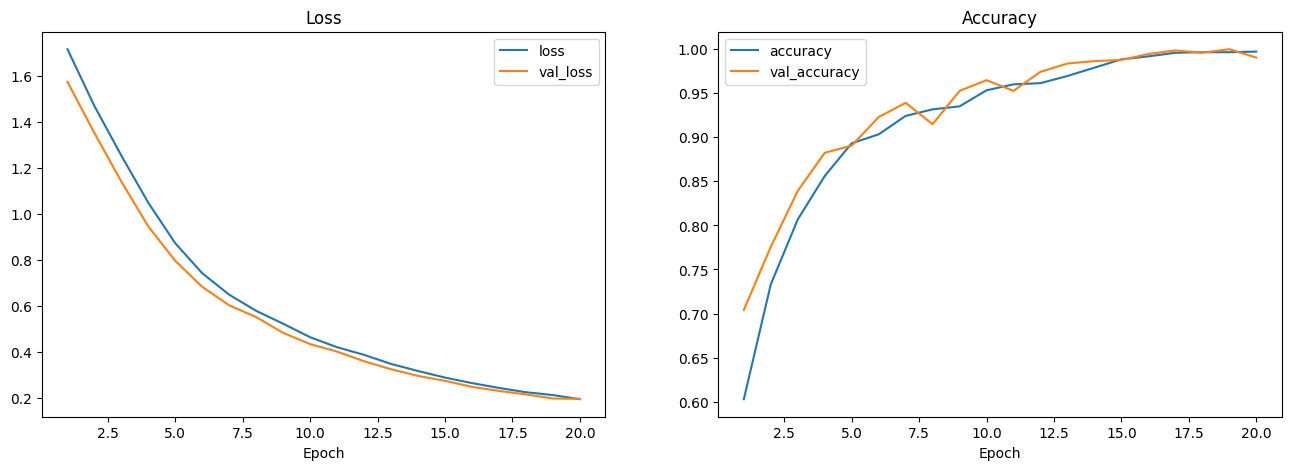

1041/1041 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.76      0.81     15312
           1       0.82      0.89      0.85     17997

    accuracy                           0.83     33309
   macro avg       0.84      0.83      0.83     33309
weighted avg       0.83      0.83      0.83     33309



In [302]:
# Mengevaluasi menggunakan plot
epoch=20
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
plt.show()

# Evaluasi classification report dengan test-set
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

Bisa dilihat bahwa model sequential ini cukup baik dengan nilai accuracy sebesar 0.83. dan nilai F1 score untuk kedua class yang terbilang seimbang dan cukup bagus. Tadi adalah evaluasi menggunakan test set, saya akan lihat hasilnya jika menggunakan train set. 

In [303]:
# Evaluasi classification report dengan train-set
y_pred_seq = model_seq.predict(X_train)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq))

24/24 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       320
           1       0.98      1.00      0.99       420

    accuracy                           0.99       740
   macro avg       0.99      0.99      0.99       740
weighted avg       0.99      0.99      0.99       740



hm, terlihat bahwa hasil accuracy dari train-set jauh lebih besar ketimbang hasil test-setnya. menandakan adanya overfitting pada model ini.

## Functional API Evaluation

Selanjutnya pada functional API, saya juga akan melihat visualisasinya dan juga classification reportnya.

<Axes: >

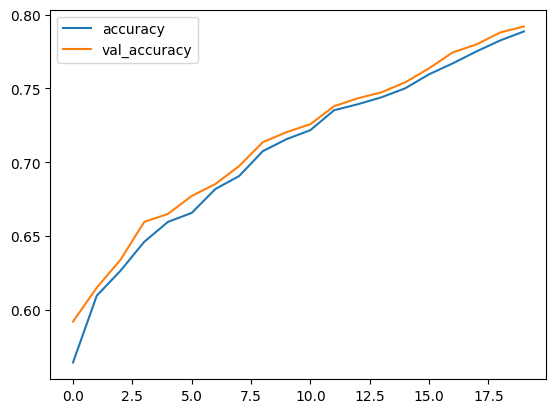

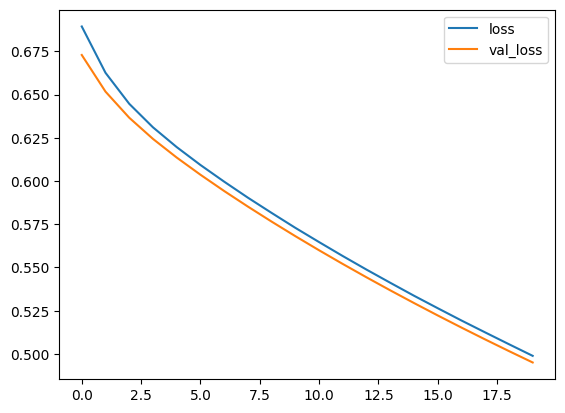

In [304]:
# Membuat dataframe
history_fun_df = pd.DataFrame(history_fun.history)
history_fun_df

# Plot hasil dari training
history_fun_df[['accuracy', 'val_accuracy']].plot()
history_fun_df[['loss', 'val_loss']].plot()

In [305]:
# Mengevaluasi hasil berdasarkan test set
y_pred_fun = model_fun.predict(X_test)
y_pred_fun = np.where(y_pred_fun >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_fun))

1041/1041 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.57      0.66     15312
           1       0.70      0.85      0.77     17997

    accuracy                           0.72     33309
   macro avg       0.74      0.71      0.71     33309
weighted avg       0.73      0.72      0.72     33309



Bisa dilihat bahwa nilai accuracy dari model functional ini masih ada dibawah sequential API tadi, menandakan peforma yang lebih rendah. Sekarang saya akan bandingkan dengan train setnya

In [306]:
# Mengevaluasi hasil berdasarkan test set
y_pred_fun = model_fun.predict(X_train)
y_pred_fun = np.where(y_pred_fun >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_fun))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       320
           1       0.77      0.90      0.83       420

    accuracy                           0.79       740
   macro avg       0.80      0.77      0.78       740
weighted avg       0.80      0.79      0.79       740



Namun bisa dilihat, gap yang ada diantara train set dan test set tidak terlalu jauh seperti halnya di sequential tadi. Namun untuk score keduanya memang masih terbilang cukup rendah jadi bisa dikategorikan sebagai underfitting. 

## ANN Improvement

Dikarenakan kedua model tadi belum memberikan hasil yang cukup memuaskan, saya akan mengubah beberapa hal untuk meningkatkan peforma model tersebut pada sequential API dan juga functional API.

### Sequential API Improvement

Untuk improvement disini saya akan menambah hidden layer menjadi 3. dan juga mengubah activation functionnya menjadi selu, sedangkan untuk initializer dan regularizer saya biarkan sama seperti yang pertama. Dan untuk optimizernya saya ganti adam menjadi SGD dengan metrics yang sama yaitu accuracy. Serta saya juga menambah epochs menjadi 25.

Epoch 1/25
36/36 [==============================] - 1s 12ms/step - loss: 1.7440 - accuracy: 0.6527 - val_loss: 1.5811 - val_accuracy: 0.7730
Epoch 2/25
36/36 [==============================] - 0s 5ms/step - loss: 1.5223 - accuracy: 0.8081 - val_loss: 1.4474 - val_accuracy: 0.8581
Epoch 3/25
36/36 [==============================] - 0s 7ms/step - loss: 1.4168 - accuracy: 0.8541 - val_loss: 1.3676 - val_accuracy: 0.8743
Epoch 4/25
36/36 [==============================] - 0s 6ms/step - loss: 1.3505 - accuracy: 0.8721 - val_loss: 1.3137 - val_accuracy: 0.8865
Epoch 5/25
36/36 [==============================] - 0s 5ms/step - loss: 1.3034 - accuracy: 0.8806 - val_loss: 1.2758 - val_accuracy: 0.9014
Epoch 6/25
36/36 [==============================] - 0s 6ms/step - loss: 1.2688 - accuracy: 0.8923 - val_loss: 1.2444 - val_accuracy: 0.8973
Epoch 7/25
36/36 [==============================] - 0s 5ms/step - loss: 1.2403 - accuracy: 0.8955 - val_loss: 1.2252 - val_accuracy: 0.9162
Epoch 8/25
36/36 [=

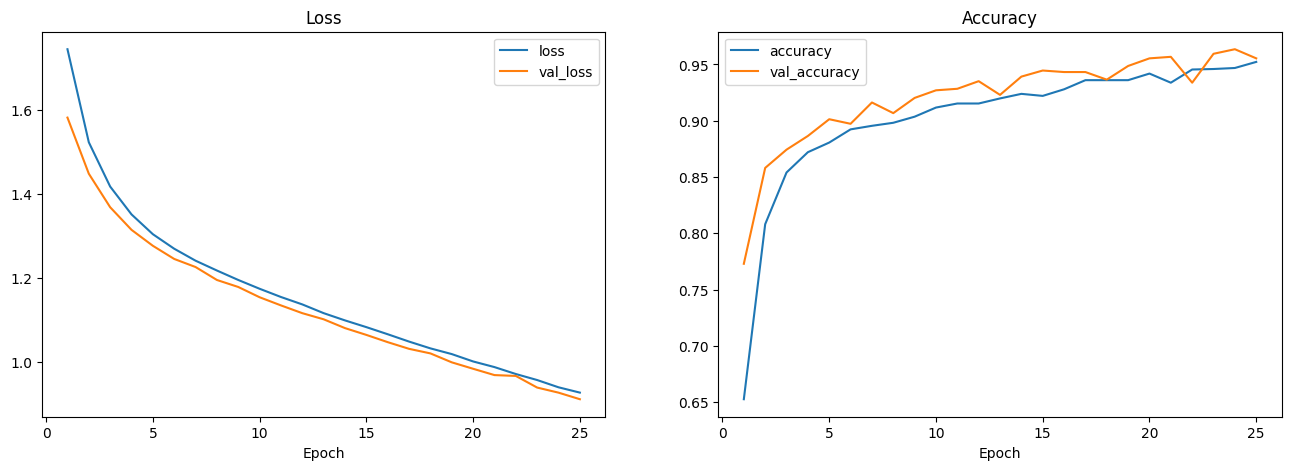

1041/1041 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     15312
           1       0.84      0.86      0.85     17997

    accuracy                           0.84     33309
   macro avg       0.84      0.84      0.84     33309
weighted avg       0.84      0.84      0.84     33309



In [307]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(64).shuffle(740).repeat(3).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
val_pipe = tf.data.Dataset.from_tensor_slices((X_valid,y_valid)).batch(32)

model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(56, activation='selu',input_shape=(56,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq.add(tf.keras.layers.Dense(150, activation='selu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(75, activation='selu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(25, activation='selu')) #hidden layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics='accuracy')


history_seq = model_seq.fit(train_pipe, epochs=25, validation_data=val_pipe)

epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()


# Evaluasi model menggunakan test set
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

Bisa dilihat ada sedikit, sangat sedikit improvement yang accuracy tadinya 0.83 menjadi 0.84, dan saya akan lihat ketika dites pada train setnya.

In [308]:
# Evaluasi model menggunakan test set
y_pred_seq = model_seq.predict(X_train)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       320
           1       0.97      0.95      0.96       420

    accuracy                           0.96       740
   macro avg       0.95      0.96      0.95       740
weighted avg       0.96      0.96      0.96       740



Terlihat bahwa nilai dari accuracy di train set lumayan besar 0.96, jadi kasusnya masih sama overfitting, ditandakan dengan besarnya gap score accuracy dari test dan juga train set.

### Functional API Improvement

Untuk improvememt di functional, saya menambah 1 hidden layer dan mengubah activation functionnya menjadi relu. dan membiarkan yang lain sama, tapi pada saat compile saya juga mengubah optimizernya dari SGD menjadi Adam.

Epoch 1/25
36/36 [==============================] - 2s 14ms/step - loss: 0.5395 - accuracy: 0.7559 - val_loss: 0.3876 - val_accuracy: 0.8608
Epoch 2/25
36/36 [==============================] - 0s 6ms/step - loss: 0.3026 - accuracy: 0.8788 - val_loss: 0.2224 - val_accuracy: 0.9216
Epoch 3/25
36/36 [==============================] - 0s 7ms/step - loss: 0.1852 - accuracy: 0.9320 - val_loss: 0.1536 - val_accuracy: 0.9514
Epoch 4/25
36/36 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9680 - val_loss: 0.0861 - val_accuracy: 0.9784
Epoch 5/25
36/36 [==============================] - 0s 6ms/step - loss: 0.0707 - accuracy: 0.9878 - val_loss: 0.0536 - val_accuracy: 0.9932
Epoch 6/25
36/36 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9968 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 7/25
36/36 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 8/25
36/36 [=

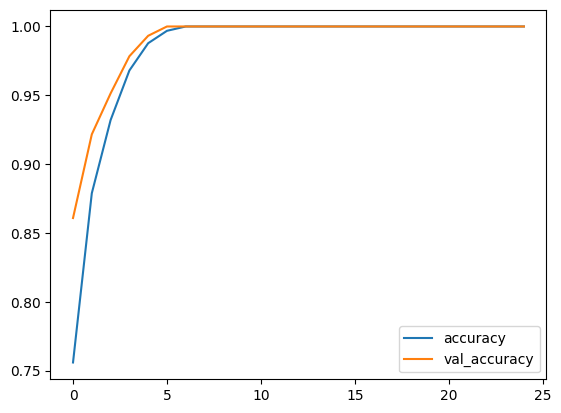

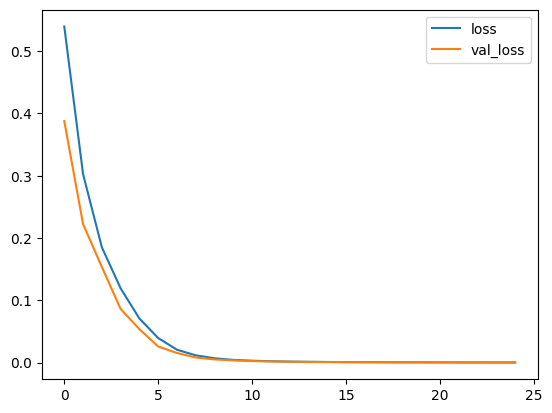

In [309]:
# Membuat model functional
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

input_layer = Input(shape=(56,))
hidden_layer_1 = Dense(150, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(75, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(25, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_2, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)
model_fun = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_fun.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')


# Train Model Functional API
history_fun = model_fun.fit(train_pipe,epochs=25,validation_data=(val_pipe),batch_size=10)

# Membuat dataframe
history_fun_df = pd.DataFrame(history_fun.history)
history_fun_df

# Plot hasil dari training
history_fun_df[['accuracy', 'val_accuracy']].plot()
history_fun_df[['loss', 'val_loss']].plot()


# Mengevaluasi hasil berdasarkan test set
y_pred_fun = model_fun.predict(X_test)
y_pred_fun = np.where(y_pred_fun >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_fun))

Bisa dilihat hasil dari functional api ini meningkat drastis dari yang pertama, namun untuk score accuracynya masih lebih tinggi yang dari sequential api. Oleh karena itu saya akan menggunakan sequential API sebagai model final yang akan saya gunakan untuk memprediksi.

# 9. Model Saving

Saya akan menyimpan model sequential yang sudah diimprove dikarenakan model tersebut memilki peforma terbaik dari keseluruhan model yang ada.

In [310]:
# Save Pipeline
with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

# Freeze Model
model_seq.trainable = False
model_seq.summary()

# Save ANN Model
model_seq.save('churn_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 56)                3192      
                                                                 
 dense_4 (Dense)             (None, 150)               8550      
                                                                 
 dense_5 (Dense)             (None, 75)                11325     
                                                                 
 dense_6 (Dense)             (None, 25)                1900      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 24,993
Trainable params: 0
Non-trainable params: 24,993
_________________________________________________________________


# 10. Conclusion

Kesimpulannya untuk segi produk dan servis, bisa dilihat dari sesi EDA, saya melihat bahwa memang orang-orang yang beresiko churn itu adalah orang-orang yang kecewa dengan produk/service yang diberikan. Bisa dilihat pada plot feedback pada bagian EDA, orang-orang dengan feedback negatif akan sangat beresiko untuk terjadinya churn, sebaliknya orang-orang yang memberikan feedback positive tidak beresiko untuk churn.

Sedangkan untuk segi model, kelebihan dari model ini adalah dalam hal accuracynya. Walaupun perbedaannya tidak terlalu signifikan, tapi terlihat jelas bahwa score accuracy milik model sequential adalah yang terbaik. Untuk kelemahan model ini, terlihat ketika dites kepada train-set, gap yang dimiliki ditinjau dari score accuracynya cukup tinggi, menandakan adanya kemungkinan overfitting pada model. 

### Further Improvement?
Pada sequential API walaupun sudah memiliki peforma yang cukup baik namun masih ada room to improve, masih banyak kombinasi-kombinasi pengaturan model yang bisa diterapkan untuk mendapatkan hasil model yang optimal. baik itu dari segi jumlah layers, jumlah neuron dari tiap layer dan juga activation function yang dipakai, serta optimizers dan juga pengaturan-pengaturan lain yang bisa diterapkan nantinya.